In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from math import pi

In [2]:
# Define the GRU model
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRU, self).__init__()

        self.hidden_size = hidden_size

        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        output, hidden = self.gru(x, hidden)
        output = self.fc(output)
        return output, hidden

In [3]:
# Set random seed for reproducibility
torch.manual_seed(42)

x size (1, 256)
t size (1, 200)
u size (256, 200)


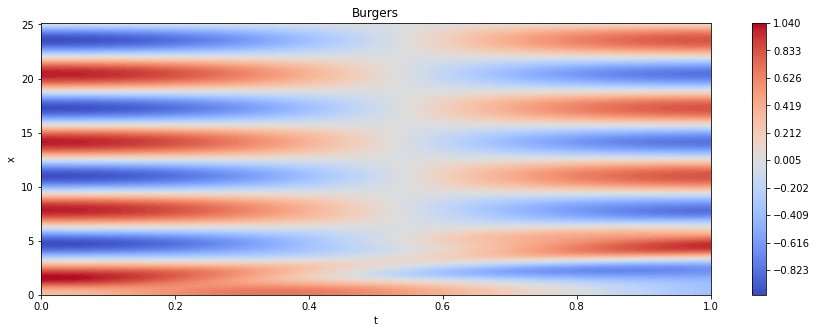

In [4]:
# importing data

# Load the .mat file
mat_data = scipy.io.loadmat('EB_winkler.mat')

# Access the variables stored in the .mat file
# The variable names in the .mat file become keys in the loaded dictionary
x = mat_data['x']
t = mat_data['t']
u = mat_data['u1']

#Use the loaded variables as needed
print("x size", x.shape)
print("t size", t.shape)
print("u size", u.shape)

X, T = np.meshgrid(x, t)
# Define custom color levels
c_levels = np.linspace(np.min(u), np.max(u), 100)

# Plot the contour
plt.figure(figsize=(15, 5))
plt.contourf(T, X, u.T, levels=c_levels, cmap='coolwarm')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Burgers')
plt.colorbar()  # Add a colorbar for the contour levels
plt.show()

In [9]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Toy problem data
input_size = 256
hidden_size = 32
output_size = 256
sequence_length = 199
batch_size = 1
num_epochs = 20000

# Set random seed for reproducibility
torch.manual_seed(42)

In [10]:
x1 = x.T
t1 = t.T

In [11]:
# Broadcasting to create the u_exact tensor with shape (100, 256)
u_exact = np.sin(x1)[:, np.newaxis] * np.cos(4 * np.pi * t1)

# Now, u_exact will have the shape (100, 256)

u_exact = u_exact.T
u_exact = torch.tensor(u_exact)
u_exact = torch.squeeze(u_exact)
u_exact.shape

torch.Size([200, 256])

In [12]:
input_data = u[:, 0:199]
target_data = u[:, 1:200]

test_data = u[ :, 0]
#test_target = u[:,80:100]

print("test data shape", test_data.shape)
#print("test target shape", test_target.shape)

print("input data shape",input_data.shape)
print("Target data shape",target_data.shape)

# Convert data to tensors
input_tensor = torch.tensor(input_data.T).view(batch_size, sequence_length, input_size).float()
target_tensor = torch.tensor(target_data.T).view(batch_size, sequence_length, output_size).float()

print("input tensor shape",input_tensor.shape)
print("Target tensor shape",target_tensor.shape)

test data shape (256,)
input data shape (256, 199)
Target data shape (256, 199)
input tensor shape torch.Size([1, 199, 256])
Target tensor shape torch.Size([1, 199, 256])


In [13]:
# Convert test data to tensors
test_tensor = torch.tensor(test_data.T).view(batch_size, 1, input_size).float()
#test_target_tensor = torch.tensor(test_target.T).view(batch_size, 20, output_size).float()
print(test_tensor.shape)

torch.Size([1, 1, 256])


In [14]:
# Create GRU instance
gru = GRU(input_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(gru.parameters(), lr=0.01)

# Training loop
for epoch in range(num_epochs):
    # Set initial hidden state
    hidden = torch.zeros(1, batch_size, hidden_size)

    # Forward pass
    output, hidden = gru(input_tensor, hidden)
    loss = criterion(output, target_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')


Epoch: 10/20000, Loss: 0.0275
Epoch: 20/20000, Loss: 0.0126
Epoch: 30/20000, Loss: 0.0058
Epoch: 40/20000, Loss: 0.0027
Epoch: 50/20000, Loss: 0.0014
Epoch: 60/20000, Loss: 0.0007
Epoch: 70/20000, Loss: 0.0005
Epoch: 80/20000, Loss: 0.0003
Epoch: 90/20000, Loss: 0.0006
Epoch: 100/20000, Loss: 0.0004
Epoch: 110/20000, Loss: 0.0002
Epoch: 120/20000, Loss: 0.0002
Epoch: 130/20000, Loss: 0.0002
Epoch: 140/20000, Loss: 0.0001
Epoch: 150/20000, Loss: 0.0001
Epoch: 160/20000, Loss: 0.0002
Epoch: 170/20000, Loss: 0.0002
Epoch: 180/20000, Loss: 0.0001
Epoch: 190/20000, Loss: 0.0001
Epoch: 200/20000, Loss: 0.0001
Epoch: 210/20000, Loss: 0.0001
Epoch: 220/20000, Loss: 0.0002
Epoch: 230/20000, Loss: 0.0005
Epoch: 240/20000, Loss: 0.0001
Epoch: 250/20000, Loss: 0.0001
Epoch: 260/20000, Loss: 0.0001
Epoch: 270/20000, Loss: 0.0001
Epoch: 280/20000, Loss: 0.0001
Epoch: 290/20000, Loss: 0.0001
Epoch: 300/20000, Loss: 0.0001
Epoch: 310/20000, Loss: 0.0001
Epoch: 320/20000, Loss: 0.0001
Epoch: 330/20000,

Epoch: 2610/20000, Loss: 0.0000
Epoch: 2620/20000, Loss: 0.0000
Epoch: 2630/20000, Loss: 0.0000
Epoch: 2640/20000, Loss: 0.0000
Epoch: 2650/20000, Loss: 0.0001
Epoch: 2660/20000, Loss: 0.0000
Epoch: 2670/20000, Loss: 0.0000
Epoch: 2680/20000, Loss: 0.0000
Epoch: 2690/20000, Loss: 0.0000
Epoch: 2700/20000, Loss: 0.0000
Epoch: 2710/20000, Loss: 0.0000
Epoch: 2720/20000, Loss: 0.0000
Epoch: 2730/20000, Loss: 0.0000
Epoch: 2740/20000, Loss: 0.0000
Epoch: 2750/20000, Loss: 0.0000
Epoch: 2760/20000, Loss: 0.0000
Epoch: 2770/20000, Loss: 0.0000
Epoch: 2780/20000, Loss: 0.0000
Epoch: 2790/20000, Loss: 0.0000
Epoch: 2800/20000, Loss: 0.0000
Epoch: 2810/20000, Loss: 0.0000
Epoch: 2820/20000, Loss: 0.0000
Epoch: 2830/20000, Loss: 0.0000
Epoch: 2840/20000, Loss: 0.0002
Epoch: 2850/20000, Loss: 0.0001
Epoch: 2860/20000, Loss: 0.0000
Epoch: 2870/20000, Loss: 0.0000
Epoch: 2880/20000, Loss: 0.0000
Epoch: 2890/20000, Loss: 0.0000
Epoch: 2900/20000, Loss: 0.0000
Epoch: 2910/20000, Loss: 0.0000
Epoch: 2

Epoch: 5180/20000, Loss: 0.0001
Epoch: 5190/20000, Loss: 0.0001
Epoch: 5200/20000, Loss: 0.0000
Epoch: 5210/20000, Loss: 0.0000
Epoch: 5220/20000, Loss: 0.0000
Epoch: 5230/20000, Loss: 0.0000
Epoch: 5240/20000, Loss: 0.0000
Epoch: 5250/20000, Loss: 0.0000
Epoch: 5260/20000, Loss: 0.0000
Epoch: 5270/20000, Loss: 0.0000
Epoch: 5280/20000, Loss: 0.0000
Epoch: 5290/20000, Loss: 0.0000
Epoch: 5300/20000, Loss: 0.0000
Epoch: 5310/20000, Loss: 0.0000
Epoch: 5320/20000, Loss: 0.0000
Epoch: 5330/20000, Loss: 0.0000
Epoch: 5340/20000, Loss: 0.0000
Epoch: 5350/20000, Loss: 0.0000
Epoch: 5360/20000, Loss: 0.0000
Epoch: 5370/20000, Loss: 0.0000
Epoch: 5380/20000, Loss: 0.0000
Epoch: 5390/20000, Loss: 0.0000
Epoch: 5400/20000, Loss: 0.0000
Epoch: 5410/20000, Loss: 0.0000
Epoch: 5420/20000, Loss: 0.0000
Epoch: 5430/20000, Loss: 0.0000
Epoch: 5440/20000, Loss: 0.0000
Epoch: 5450/20000, Loss: 0.0000
Epoch: 5460/20000, Loss: 0.0000
Epoch: 5470/20000, Loss: 0.0000
Epoch: 5480/20000, Loss: 0.0000
Epoch: 5

Epoch: 7750/20000, Loss: 0.0001
Epoch: 7760/20000, Loss: 0.0000
Epoch: 7770/20000, Loss: 0.0000
Epoch: 7780/20000, Loss: 0.0000
Epoch: 7790/20000, Loss: 0.0000
Epoch: 7800/20000, Loss: 0.0000
Epoch: 7810/20000, Loss: 0.0000
Epoch: 7820/20000, Loss: 0.0000
Epoch: 7830/20000, Loss: 0.0000
Epoch: 7840/20000, Loss: 0.0000
Epoch: 7850/20000, Loss: 0.0000
Epoch: 7860/20000, Loss: 0.0000
Epoch: 7870/20000, Loss: 0.0000
Epoch: 7880/20000, Loss: 0.0000
Epoch: 7890/20000, Loss: 0.0000
Epoch: 7900/20000, Loss: 0.0000
Epoch: 7910/20000, Loss: 0.0000
Epoch: 7920/20000, Loss: 0.0000
Epoch: 7930/20000, Loss: 0.0000
Epoch: 7940/20000, Loss: 0.0000
Epoch: 7950/20000, Loss: 0.0000
Epoch: 7960/20000, Loss: 0.0000
Epoch: 7970/20000, Loss: 0.0000
Epoch: 7980/20000, Loss: 0.0000
Epoch: 7990/20000, Loss: 0.0000
Epoch: 8000/20000, Loss: 0.0001
Epoch: 8010/20000, Loss: 0.0000
Epoch: 8020/20000, Loss: 0.0000
Epoch: 8030/20000, Loss: 0.0000
Epoch: 8040/20000, Loss: 0.0000
Epoch: 8050/20000, Loss: 0.0000
Epoch: 8

Epoch: 10320/20000, Loss: 0.0000
Epoch: 10330/20000, Loss: 0.0000
Epoch: 10340/20000, Loss: 0.0000
Epoch: 10350/20000, Loss: 0.0000
Epoch: 10360/20000, Loss: 0.0000
Epoch: 10370/20000, Loss: 0.0000
Epoch: 10380/20000, Loss: 0.0000
Epoch: 10390/20000, Loss: 0.0000
Epoch: 10400/20000, Loss: 0.0000
Epoch: 10410/20000, Loss: 0.0000
Epoch: 10420/20000, Loss: 0.0000
Epoch: 10430/20000, Loss: 0.0000
Epoch: 10440/20000, Loss: 0.0000
Epoch: 10450/20000, Loss: 0.0000
Epoch: 10460/20000, Loss: 0.0000
Epoch: 10470/20000, Loss: 0.0001
Epoch: 10480/20000, Loss: 0.0000
Epoch: 10490/20000, Loss: 0.0000
Epoch: 10500/20000, Loss: 0.0000
Epoch: 10510/20000, Loss: 0.0000
Epoch: 10520/20000, Loss: 0.0000
Epoch: 10530/20000, Loss: 0.0000
Epoch: 10540/20000, Loss: 0.0000
Epoch: 10550/20000, Loss: 0.0000
Epoch: 10560/20000, Loss: 0.0000
Epoch: 10570/20000, Loss: 0.0000
Epoch: 10580/20000, Loss: 0.0000
Epoch: 10590/20000, Loss: 0.0000
Epoch: 10600/20000, Loss: 0.0000
Epoch: 10610/20000, Loss: 0.0000
Epoch: 106

Epoch: 12820/20000, Loss: 0.0000
Epoch: 12830/20000, Loss: 0.0000
Epoch: 12840/20000, Loss: 0.0000
Epoch: 12850/20000, Loss: 0.0000
Epoch: 12860/20000, Loss: 0.0001
Epoch: 12870/20000, Loss: 0.0000
Epoch: 12880/20000, Loss: 0.0000
Epoch: 12890/20000, Loss: 0.0000
Epoch: 12900/20000, Loss: 0.0000
Epoch: 12910/20000, Loss: 0.0000
Epoch: 12920/20000, Loss: 0.0000
Epoch: 12930/20000, Loss: 0.0000
Epoch: 12940/20000, Loss: 0.0000
Epoch: 12950/20000, Loss: 0.0000
Epoch: 12960/20000, Loss: 0.0000
Epoch: 12970/20000, Loss: 0.0000
Epoch: 12980/20000, Loss: 0.0000
Epoch: 12990/20000, Loss: 0.0000
Epoch: 13000/20000, Loss: 0.0000
Epoch: 13010/20000, Loss: 0.0000
Epoch: 13020/20000, Loss: 0.0000
Epoch: 13030/20000, Loss: 0.0000
Epoch: 13040/20000, Loss: 0.0000
Epoch: 13050/20000, Loss: 0.0000
Epoch: 13060/20000, Loss: 0.0000
Epoch: 13070/20000, Loss: 0.0000
Epoch: 13080/20000, Loss: 0.0000
Epoch: 13090/20000, Loss: 0.0000
Epoch: 13100/20000, Loss: 0.0000
Epoch: 13110/20000, Loss: 0.0000
Epoch: 131

Epoch: 15310/20000, Loss: 0.0000
Epoch: 15320/20000, Loss: 0.0000
Epoch: 15330/20000, Loss: 0.0000
Epoch: 15340/20000, Loss: 0.0001
Epoch: 15350/20000, Loss: 0.0000
Epoch: 15360/20000, Loss: 0.0000
Epoch: 15370/20000, Loss: 0.0000
Epoch: 15380/20000, Loss: 0.0000
Epoch: 15390/20000, Loss: 0.0000
Epoch: 15400/20000, Loss: 0.0000
Epoch: 15410/20000, Loss: 0.0001
Epoch: 15420/20000, Loss: 0.0000
Epoch: 15430/20000, Loss: 0.0000
Epoch: 15440/20000, Loss: 0.0000
Epoch: 15450/20000, Loss: 0.0000
Epoch: 15460/20000, Loss: 0.0000
Epoch: 15470/20000, Loss: 0.0000
Epoch: 15480/20000, Loss: 0.0001
Epoch: 15490/20000, Loss: 0.0000
Epoch: 15500/20000, Loss: 0.0000
Epoch: 15510/20000, Loss: 0.0000
Epoch: 15520/20000, Loss: 0.0000
Epoch: 15530/20000, Loss: 0.0000
Epoch: 15540/20000, Loss: 0.0000
Epoch: 15550/20000, Loss: 0.0000
Epoch: 15560/20000, Loss: 0.0000
Epoch: 15570/20000, Loss: 0.0000
Epoch: 15580/20000, Loss: 0.0000
Epoch: 15590/20000, Loss: 0.0001
Epoch: 15600/20000, Loss: 0.0000
Epoch: 156

Epoch: 17800/20000, Loss: 0.0000
Epoch: 17810/20000, Loss: 0.0000
Epoch: 17820/20000, Loss: 0.0000
Epoch: 17830/20000, Loss: 0.0000
Epoch: 17840/20000, Loss: 0.0000
Epoch: 17850/20000, Loss: 0.0000
Epoch: 17860/20000, Loss: 0.0000
Epoch: 17870/20000, Loss: 0.0000
Epoch: 17880/20000, Loss: 0.0000
Epoch: 17890/20000, Loss: 0.0000
Epoch: 17900/20000, Loss: 0.0000
Epoch: 17910/20000, Loss: 0.0000
Epoch: 17920/20000, Loss: 0.0000
Epoch: 17930/20000, Loss: 0.0000
Epoch: 17940/20000, Loss: 0.0000
Epoch: 17950/20000, Loss: 0.0000
Epoch: 17960/20000, Loss: 0.0000
Epoch: 17970/20000, Loss: 0.0000
Epoch: 17980/20000, Loss: 0.0000
Epoch: 17990/20000, Loss: 0.0000
Epoch: 18000/20000, Loss: 0.0000
Epoch: 18010/20000, Loss: 0.0000
Epoch: 18020/20000, Loss: 0.0000
Epoch: 18030/20000, Loss: 0.0000
Epoch: 18040/20000, Loss: 0.0000
Epoch: 18050/20000, Loss: 0.0000
Epoch: 18060/20000, Loss: 0.0000
Epoch: 18070/20000, Loss: 0.0000
Epoch: 18080/20000, Loss: 0.0000
Epoch: 18090/20000, Loss: 0.0000
Epoch: 181

In [19]:
x1 = x.T
t1 = t.T

In [20]:
# Broadcasting to create the u_exact tensor with shape (100, 256)
u_exact = np.sin(x1)[:, np.newaxis] * np.cos(np.pi * t1)

# Now, u_exact will have the shape (100, 256)

u_exact = u_exact.T
u_exact = torch.tensor(u_exact)
u_exact = torch.squeeze(u_exact)
u_exact.shape

torch.Size([200, 256])

In [21]:
hidden_pred = torch.zeros(1, batch_size, hidden_size)
prediction_full, _ = gru(input_tensor, hidden_pred)

In [22]:
prediction_full.shape
prediction_full = torch.squeeze(prediction_full)
print(prediction_full.shape)

torch.Size([199, 256])


In [23]:
prediction_full.shape

torch.Size([199, 256])

In [24]:

u_test = u_exact
u_test_full = u_test[0:199, :]

In [25]:
k1 = ( prediction_full - u_test_full)**2
u_test_full_tensor = u_test_full**2
u_test_full_tensor.shape

torch.Size([199, 256])

In [26]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean(k1)/ torch.mean(u_test_full_tensor)

print("Relative Error Test: ", relative_error_test.item(), "%")

Relative Error Test:  0.05825709977222291 %


In [ ]:
2+

In [ ]:
print(test_tensor.shape)
prediction_tensor = torch.zeros(1, 20, 256).float()
print(prediction_tensor.shape)

In [ ]:
with torch.no_grad():
    hidden_pred = torch.zeros(1, batch_size, hidden_size)
    prediction, _ = gru(test_tensor, hidden_pred)
    prediction = prediction.view(1, 1, 256).float()
    prediction_tensor[:, 0, :] = prediction
    for i in range(19):
        hidden_pred = torch.zeros(1, batch_size, hidden_size)
        prediction, _ = gru(prediction, hidden_pred)
        prediction = prediction.view(1, 1, 256).float()
        prediction_tensor[:, i+1, :] = prediction

In [ ]:
prediction_tensor.shape
prediction_tensor = torch.squeeze(prediction_tensor)
print(prediction_tensor.shape)

In [ ]:
# Exact Solution

u_test = u_exact
u_test_full = u_test[80:100, :]


In [ ]:
### L2 norm

# Extrapolation

k1 = ( prediction_tensor - u_test_full)**2
u_test_full_tensor = u_test_full**2
u_test_full_tensor.shape

# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean(k1)/ torch.mean(u_test_full_tensor)

print("Relative Error Test: ", relative_error_test.item(), "%")


In [ ]:
### Maximum absolute 

R_abs = torch.max(torch.abs(prediction_tensor - u_test_full))
print(R_abs)

### Explained variance score

import torch

a = prediction_tensor
b = u_test_full
# Assuming 'a' is your predicted values (model's predictions) and 'b' is the true values (ground truth)
# Make sure 'a' and 'b' are PyTorch tensors


# Calculate the mean of 'b'
mean_b = torch.mean(b)

# Calculate the Explained Variance Score
numerator = torch.var(b - a)  # Variance of the differences between 'b' and 'a'
denominator = torch.var(b)    # Variance of 'b'
evs = 1 - numerator / denominator

print("Explained Variance Score:", evs.item())

### mean absolute error

# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean(torch.abs(prediction_tensor - u_test_full))

print("Relative Error Test: ", relative_error_test, "%")




In [ ]:
print(prediction_tensor.shape)

prediction.shape


In [ ]:
x1 = np.linspace(0, pi, 256)
t1 = np.linspace(0, 1, 99)

conc_u = torch.squeeze(input_tensor)
concatenated_tensor = torch.cat((conc_u, prediction_tensor), dim=0)


In [ ]:
### Contour 80-20

import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

# Assuming you have defined concatenated_tensor as a PyTorch tensor
# concatenated_tensor = torch.cat((tensor1, tensor2), dim=0)

# Convert concatenated_tensor to a NumPy array
concatenated_array = concatenated_tensor.numpy()

# Define custom color levels
x = np.linspace(0, 1, concatenated_array.shape[1])  # Replace 0 and 1 with your actual x range
t = np.linspace(0, 1, concatenated_array.shape[0])  # Replace 0 and 1 with your actual t range
X, T = np.meshgrid(x1, t1)

# Define custom color levels using the minimum and maximum from the NumPy array
c_levels = np.linspace(np.min(concatenated_array), np.max(concatenated_array), 400)

# Plot the contour with interpolated data
plt.figure(figsize=(20, 5))
plt.pcolormesh(T, X, concatenated_array, shading='auto', cmap='twilight')

# Set the fontweight for axis labels to regular (not bold)
plt.xlabel("$t$", fontsize=26)
plt.ylabel("$x$", fontsize=26)
plt.title("$u(x, t)$", fontsize=26)

# Set tick labels fontweight to regular (not bold) and increase font size
plt.tick_params(axis='both', which='major', labelsize=20, width=3, length=10)

# Set the fontweight for tick labels to regular (not bold)
for tick in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    tick.set_weight('normal')

# Set the number of ticks for x-axis and y-axis to 5
num_ticks = 5
x_ticks = np.linspace(np.min(T), np.max(T), num_ticks)
y_ticks = np.linspace(np.min(X), np.max(X), num_ticks)

plt.gca().xaxis.set_major_locator(FixedLocator(x_ticks))
plt.gca().yaxis.set_major_locator(FixedLocator(y_ticks))

cbar1 = plt.colorbar()
# Set the number of ticks for the color bar with uniformly distributed numbers
num_ticks = 5
c_ticks = np.linspace(np.min(concatenated_array), np.max(concatenated_array), num_ticks)
cbar1.set_ticks(c_ticks)

# Set the fontweight and fontsize for color bar tick labels
for t in cbar1.ax.get_yticklabels():
    t.set_weight('normal')
    t.set_fontsize(26)  # Increase the font size for color bar tick labels

# Increase the size of numbers on axis and color bar
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

# Increase the tick size and width of the color bar
cbar1.ax.tick_params(axis='both', which='major', labelsize=30, width=3,  length=10)

# Add a dotted line at t = 0.8
plt.axvline(x=0.8, color='black', linestyle='dotted', linewidth=5)

#plt.savefig('Contour_LEM_20.pdf', dpi=500, bbox_inches="tight")
plt.savefig('contour_GRU_20.jpeg', dpi=500, bbox_inches="tight")
# Show the plot
plt.show()




In [ ]:
### snapshots

print(prediction_tensor.shape)

print(u_exact.shape)

x = np.linspace(0, pi, 256)
t = np.linspace(0, 1, 100)
t[-2]

import matplotlib.pyplot as plt
import numpy as np
import torch

# Create the figure and axis objects with reduced width
fig, ax = plt.subplots(figsize=(5, 5))  # You can adjust the width (7 inches) and height (5 inches) as needed



final_time_output = prediction_tensor[-2, :]
final_out = final_time_output.detach().numpy().reshape(-1, 1)
final_true = u_exact[-2, :].reshape(-1, 1)

# Plot the data with red and blue lines, one with dotted and one with solid style
ax.plot(x, final_out, color='red', linestyle='dotted', linewidth=12, label='Prediction')
ax.plot(x, final_true, color='blue', linestyle='solid', linewidth=7, label='True')


# Set the axis labels with bold font weight
ax.set_xlabel(r"${x}$", fontsize=26, color='black', fontdict={'weight': 'bold'})
ax.set_ylabel(r"${u(x, t)}$", fontsize=26, color='black', fontdict={'weight': 'bold'})

# Set the title with bold font weight
ax.set_title(r"${t = 0.98}$", fontsize=26, color='black', fontweight='bold')

# Set the number of ticks for x-axis and y-axis to 3
ax.set_xticks([-0.5, 1.5, 3.5])
ax.set_yticks([0, 0.5, 1])

# Set tick labels fontweight to bold and increase font size
ax.tick_params(axis='both', which='major', labelsize=20, width=2, length=10)

# # Set the fontweight for tick labels to bold
# for tick in ax.get_xticklabels() + ax.get_yticklabels():
#     tick.set_weight('bold')

# Set the spines linewidth to bold
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Set the legend
# ax.legend()

plt.savefig('GRU_0.98_20.pdf', dpi=500, bbox_inches="tight")
#plt.savefig('lem_0.98_20.png', dpi=500, bbox_inches="tight")
# Show the plot
plt.show()


print(prediction_tensor.shape)



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Create the figure and axis objects with reduced width
fig, ax = plt.subplots(figsize=(5, 5))  # You can adjust the width (7 inches) and height (5 inches) as needed



final_time_output = prediction_tensor[3, :]
final_out = final_time_output.detach().numpy().reshape(-1, 1)
final_true = u_exact[83, :].reshape(-1, 1)

# Plot the data with red and blue lines, one with dotted and one with solid style
ax.plot(x, final_out, color='red', linestyle='dotted', linewidth=12, label='Prediction')
ax.plot(x, final_true, color='blue', linestyle='solid', linewidth=7, label='True')


# Set the axis labels with bold font weight
ax.set_xlabel(r"${x}$", fontsize=26, color='black', fontdict={'weight': 'bold'})
ax.set_ylabel(r"${u(x, t)}$", fontsize=26, color='black', fontdict={'weight': 'bold'})

# Set the title with bold font weight
ax.set_title(r"${t = 0.83}$", fontsize=26, color='black', fontweight='bold')

# Set the number of ticks for x-axis and y-axis to 3
ax.set_xticks([-0.5, 1.5, 3.5])
ax.set_yticks([-0.75, 0, 0.75])

# Set tick labels fontweight to bold and increase font size
ax.tick_params(axis='both', which='major', labelsize=20, width=2, length=10)

# # Set the fontweight for tick labels to bold
# for tick in ax.get_xticklabels() + ax.get_yticklabels():
#     tick.set_weight('bold')

# Set the spines linewidth to bold
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Set the legend
# ax.legend()

plt.savefig('GRU_0.83_20.pdf', dpi=500, bbox_inches="tight")
#plt.savefig('lem_0.98_20.png', dpi=500, bbox_inches="tight")
# Show the plot
plt.show()


